<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/159_168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**5.4 패키지**

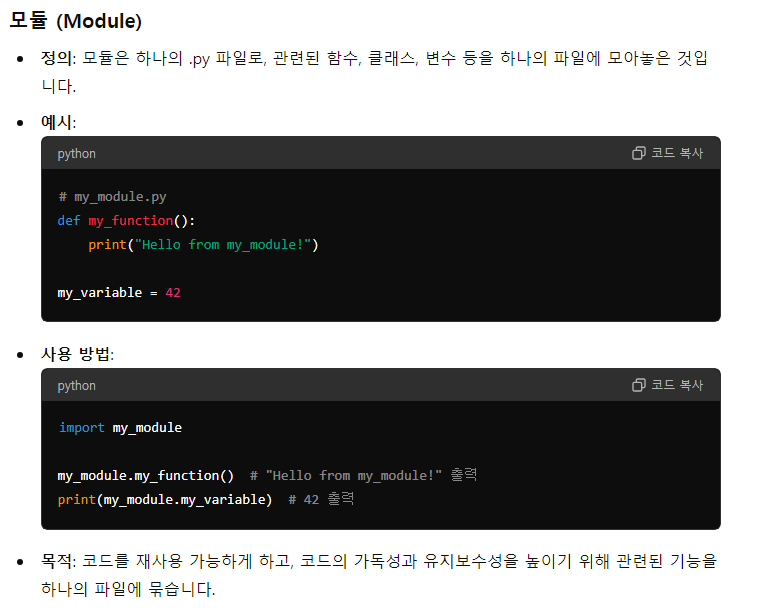

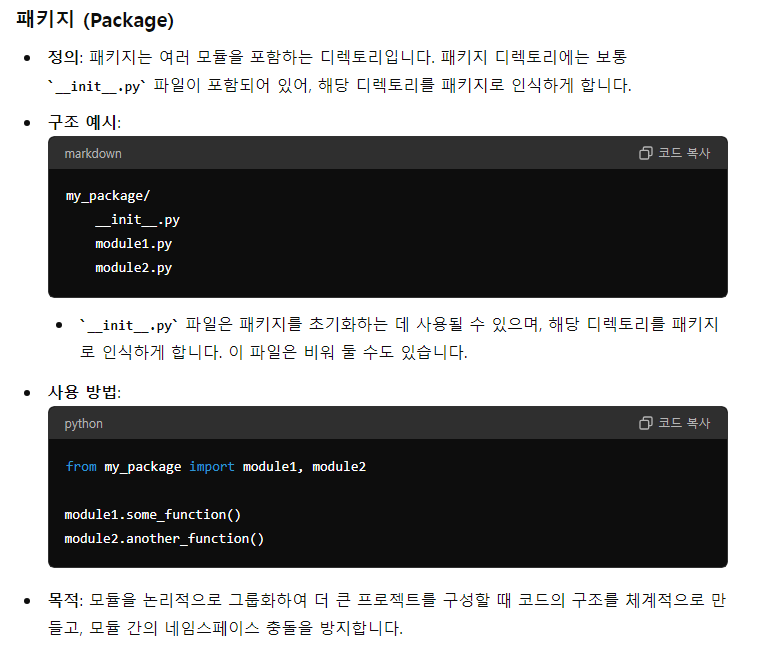

**5.5 파이썬 표준 라이브러리**

In [2]:
# 파이썬의 두드러진 점 중 하나는 배터리 포함이라는 철학으로 유용한 작업을 처리하는 많은 표준 라이브러리
# 모듈이 있는 것이다. 파이썬 코드를 작성할 때는 원하는 기능이 표준 모듈에 있는지 먼저 확인하는 것이 좋다.

# 5.5.1 누락된 키 처리하기: setdefault(), defaultdict()
# 존재하지 않는 키로 딕셔너리에 접근하려 하면 예외가 발생한다. 기본값을 반환하는 딕셔너리의 get()함수를
# 사용하면 이 예외를 피할 수 있다.

periodic_table={'hydrogen':1,'helium':2}
print('periodic_table값:',periodic_table)

carbon=periodic_table.setdefault('carbon',12)
print('carbon값:',carbon)

print('periodic_table값:',periodic_table)

# 존재하는 키에 다른 기본값을 할당하려 하면 키에 대한 원래 값이 반환되고 아무것도 바뀌지 않는다.
helium=periodic_table.setdefault('helium',947)
print('periodic_table값:',periodic_table)

# defaultdict()함수: setdefault()와 다른 것은 딕셔너리를 생성할 때 모든 새 키에 대한 기본값을 먼저 지정한다는 것이다.

periodic_table값: {'hydrogen': 1, 'helium': 2}
carbon값: 12
periodic_table값: {'hydrogen': 1, 'helium': 2, 'carbon': 12}
periodic_table값: {'hydrogen': 1, 'helium': 2, 'carbon': 12}


In [3]:
from collections import defaultdict
periodic_table=defaultdict(int)
# 몸든 누락된 기본 값은 0이다.

print('periodic_table값:',periodic_table)
periodic_table['hydrogen']=1
print('periodic_table[lead값]:',periodic_table['lead'])
print('periodic_table값:',periodic_table); print('\n')
# defaultdict()의 인자: 값을 누락된 키에 할당하여 반환하는 함수.
# 따라서 periodic_table[lead값]이 int인 0이 된다.
print('periodic_table[harry]:',periodic_table['harry'])
print('periodic_table값:',periodic_table)

periodic_table값: defaultdict(<class 'int'>, {})
periodic_table[lead값]: 0
periodic_table값: defaultdict(<class 'int'>, {'hydrogen': 1, 'lead': 0})


periodic_table[harry]: 0
periodic_table값: defaultdict(<class 'int'>, {'hydrogen': 1, 'lead': 0, 'harry': 0})


In [4]:
def no_idea():
  return 'huh?'

bestiary=defaultdict(no_idea)
bestiary['A']='abominable snowman'
bestiary['B']='basilisk'
print('bestiary값:',bestiary)
print('bestiary[C]값:',bestiary['C']); print('\n')

print('bestiary값:',bestiary)
# 빈 기본값을 반환하기 위해 int()함수는 정수 0, list()함수는 빈 리스트
# dict()함수는 빈 딕셔너리({ })를 반환한다. 인자를 입력하지 않으면, 새로운 키의 초깃값이 None으로 설정된다.

bestiary값: defaultdict(<function no_idea at 0x79a8b46b77f0>, {'A': 'abominable snowman', 'B': 'basilisk'})
bestiary[C]값: huh?


bestiary값: defaultdict(<function no_idea at 0x79a8b46b77f0>, {'A': 'abominable snowman', 'B': 'basilisk', 'C': 'huh?'})


In [5]:
# lambda를 사용하여 인자에 기본값을 만드는 함수를 정의할 수 있다.
bestiary=defaultdict(lambda:'huh??')
print('bestiary[E]값:',bestiary['E'])
print('bestiary값:',bestiary)

bestiary[E]값: huh??
bestiary값: defaultdict(<function <lambda> at 0x79a8b46b7d90>, {'E': 'huh??'})


In [6]:
from collections import defaultdict
food_counter=defaultdict(int)
for food in ['spam','eggs','spam','spam']:
  food_counter[food]+=1

In [7]:
for food, count in food_counter.items():
  print(food, count)

spam 3
eggs 1


In [8]:
# food_counter 딕셔너리가 defaultdict가 아닌 일반 딕셔너리였다면, 파이썬은 딕셔너리 요소의 food_counter[food]를
# 증가시키려고 할 때마다 예외를 발생시킨다. 딕셔너리가 초기화되지 않았기 때문이다.
# 예외를 피하려면 다음과 같은 추가 작업이 필요하다.
dict_counter={}
for food in ['spam','spam','eggs','spam']:
  if not food in dict_counter: # 초기화
    dict_counter[food]=0
  dict_counter[food]+=1

for food, count in dict_counter.items():
  print(food, count)

spam 3
eggs 1


**5.5.2 항목 세기(counter): 2024.08.01**

In [10]:
from collections import Counter
breakfast=['spam','spam','eggs','spam']

breakfast_counter=Counter(breakfast)
breakfast_counter

Counter({'spam': 3, 'eggs': 1})

In [11]:
# most_common()함수: 모든 요소를 내림차순으로 반환한다.
breakfast_counter.most_common()

[('spam', 3), ('eggs', 1)]

In [13]:
lunch=['eggs','eggs','bacon']
lunch_counter=Counter(lunch)
lunch_counter

Counter({'eggs': 2, 'bacon': 1})

In [14]:
breakfast_counter+lunch_counter
# +연산자를 사용해서 두 카운터를 결합할 수 있다.

Counter({'spam': 3, 'eggs': 3, 'bacon': 1})

In [15]:
# 유니온 |
breakfast_counter | lunch_counter

Counter({'spam': 3, 'eggs': 2, 'bacon': 1})

**5.5.3 키 정렬하기:OrderDict()**

In [19]:
# OrderedDict()함수: 키의 추가 순서를 기억하고, 이터레이터로부터 순서대로 키값을 반환한다.
from collections import OrderedDict
quotes=OrderedDict([('Moe','A wise guy, huh?'), ('Larry', 'Ow!'),('Curly','Nyuk nyunk!')])

for stooge in quotes:
  print(stooge)
# A wise guy,huh? - Nyuk nyunk - Ow

Moe
Larry
Curly


**5.5.4 스택 + 큐 = 데크**

In [20]:
# 데크: 스택과 큐의 기능을 모두 가진 출입구가 양 끝에 있는 큐.
# 데크는 시퀀스의 양 끝으로부터 항목을 추가하거나 삭제할 때 유용하게 쓰인다.

# popleft()함수: 데크로부터 왼쪽 끝의 항목을 제거한 후, 그 항목을 반환한다.
# pop()함수: 오른쪽 끝의 항목을 제거한 후, 그 항목을 반환한다.
# 양쪽 문자가 서로 일치한다면 단어 중간에 도달할 때까지 데크를 pop한다.

def palindrome(word):
  from collections import deque
  dq=deque(word)
  while len(dq)>1:
    if dq.popleft() != dq.pop():
      return False
  return True

In [21]:
palindrome('halibut')

False

In [24]:
palindrome('racecar')
# 회문: 앞에서 읽으나 뒤에서 읽으나 똑같은 단어

def another_palidrome(word):
  return word == word[::-1]

another_palidrome('radar')

True

**5.5.5 코드 구조 순회하기: itertools**

In [4]:
# itertools: 특수 목적의 이터레이터 함수를 포함하고 있다.
# chain()함수: 순회 가능한 인자들을 하나씩 반환.
import itertools
i=0
for item in itertools.chain([1,2],['a','b']):
  print(item)
  i=i+1
  print('i값:',i)

1
i값: 1
2
i값: 2
a
i값: 3
b
i값: 4


In [5]:
# cycle()함수: 인자를 순환하는 무한 이터레이터다.
import itertools
for item in itertools.cycle([1,2]):
  print(item)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2
1
2


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-ae371fa980fa>", line 4, in <cell line: 3>
    print(item)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 400, in write
    is_child = (not self._is_master_process())
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 309, in _is_master_process
    return os.getpid() == self._master_pid
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most

TypeError: object of type 'NoneType' has no len()

In [6]:
# accumulta()함수: 축적된 값을 계산.
import itertools
for item in itertools.accumulate([1,2,3,4]):
  print(item)

1
3
6
10


In [8]:
import itertools
def multiply(a,b):
  return a*b

for item in itertools.accumulate([1,2,3,4], multiply):
  print(item)

1
2
6
24


**5.5.6 깔끔하게 출력하기: pprint()**

In [14]:
# 지금까지는 모든 예제를 print()함수를 사용해서 출력하거나, 대화식 인터프리터에서 변수 이름을 사용하여 출력.
# 출력된 결과를 읽기 힘든 경우, pprint()함수와 같은 멋진 프린터가 필요하다.

from pprint import pprint
from collections import OrderedDict

quotes=OrderedDict([('Moe','A wise guy, huh?'),('Larry','Ow!'),('Curly','Nyuk nyuk!')])
quotes

OrderedDict([('Moe', 'A wise guy, huh?'),
             ('Larry', 'Ow!'),
             ('Curly', 'Nyuk nyuk!')])

In [15]:
print(quotes)

OrderedDict([('Moe', 'A wise guy, huh?'), ('Larry', 'Ow!'), ('Curly', 'Nyuk nyuk!')])


In [16]:
pprint(quotes)
# 가독성을 위해 요소들을 정렬하여 출력한다.

OrderedDict([('Moe', 'A wise guy, huh?'),
             ('Larry', 'Ow!'),
             ('Curly', 'Nyuk nyuk!')])
